# Датасет Bike Sharing Dataset для задач машинного обучения

 Bike Sharing Dataset
Описание: Этот датасет содержит информацию о прокате велосипедов в Вашингтоне, включая время начала и окончания поездки, координаты станций проката и другие параметры.
Источник: UCI Machine Learning Repository
Применение: Анализ использования велосипедов, прогнозирование спроса, оптимизация расположения станций проката.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Скачиваем датасет
notdata = pd.read_csv('/content/drive/MyDrive/day.csv')
notdata.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [70]:
selected_columns =['dteday', 'cnt']
data = notdata[selected_columns]
data.head()
print(data.tail())

         dteday   cnt
726  2012-12-27  2114
727  2012-12-28  3095
728  2012-12-29  1341
729  2012-12-30  1796
730  2012-12-31  2729


In [71]:
data.set_index('dteday', inplace = True)
data.head()

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


In [72]:
# Преобразование данных в массив numpy
data = data.values.astype('float32')  # Преобразование данных в формат float32 для последующей обработки

# Нормализация данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # Инициализация скейлера для приведения данных к диапазону от 0 до 1
dataset = scaler.fit_transform(data)  # Применение скейлера к данным

# Разбиение на обучающую и тестовую выборки
train_size = int(len(dataset) * 0.67)  # Определение размера обучающей выборки (67% от общего количества данных)
train, test = dataset[0:train_size, :], dataset[train_size:, :]  # Разделение данных на обучающие и тестовые

# Преобразование данных в последовательности (X, Y)
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        # Формирование последовательности входных данных длиной look_back
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        # Целевое значение - следующий элемент после последовательности
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3  # Количество предыдущих временных шагов для использования в качестве входных данных
X_train, Y_train = create_dataset(train, look_back)  # Создание обучающего датасета
X_test, Y_test = create_dataset(test, look_back)  # Создание тестового датасета

# Изменение формы данных для моделей RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Преобразование в форму [samples, timesteps, features] для RNN-моделей
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Аналогично для тестовых данных

print(X_train.shape, Y_train.shape)
print(X_train[0], Y_train[0])

(486, 3, 1) (486,)
[[0.11079153]
 [0.08962264]
 [0.15266912]] 0.17717442


# Рекуррентная нейронная сеть (RNN)

In [8]:
# Базовая архитектура с одним RNN-слоем

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Создание модели
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(look_back, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
history = model_rnn.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Прогнозирование
train_predict_rnn = model_rnn.predict(X_train)
test_predict_rnn = model_rnn.predict(X_test)

Epoch 1/100
16/16 - 4s - loss: 0.1423 - val_loss: 0.0411 - 4s/epoch - 244ms/step
Epoch 2/100
16/16 - 0s - loss: 0.0200 - val_loss: 0.0548 - 293ms/epoch - 18ms/step
Epoch 3/100
16/16 - 0s - loss: 0.0132 - val_loss: 0.0224 - 265ms/epoch - 17ms/step
Epoch 4/100
16/16 - 0s - loss: 0.0114 - val_loss: 0.0281 - 482ms/epoch - 30ms/step
Epoch 5/100
16/16 - 0s - loss: 0.0108 - val_loss: 0.0236 - 369ms/epoch - 23ms/step
Epoch 6/100
16/16 - 0s - loss: 0.0105 - val_loss: 0.0222 - 141ms/epoch - 9ms/step
Epoch 7/100
16/16 - 0s - loss: 0.0102 - val_loss: 0.0206 - 195ms/epoch - 12ms/step
Epoch 8/100
16/16 - 0s - loss: 0.0105 - val_loss: 0.0275 - 148ms/epoch - 9ms/step
Epoch 9/100
16/16 - 0s - loss: 0.0099 - val_loss: 0.0187 - 198ms/epoch - 12ms/step
Epoch 10/100
16/16 - 0s - loss: 0.0097 - val_loss: 0.0202 - 232ms/epoch - 15ms/step
Epoch 11/100
16/16 - 0s - loss: 0.0094 - val_loss: 0.0196 - 203ms/epoch - 13ms/step
Epoch 12/100
16/16 - 0s - loss: 0.0095 - val_loss: 0.0182 - 201ms/epoch - 13ms/step
Epoch

Оцениваем Качество

In [9]:
from sklearn.metrics import mean_squared_error

# Возвращение данных в исходный масштаб
train_predict_rnn = scaler.inverse_transform(train_predict_rnn)
Y_train_actual = scaler.inverse_transform([Y_train])
test_predict_rnn = scaler.inverse_transform(test_predict_rnn)
Y_test_actual = scaler.inverse_transform([Y_test])

# Вычисление RMSE
train_score = np.sqrt(mean_squared_error(Y_train_actual[0], train_predict_rnn[:,0]))
print(f'RMSE на обучающем наборе: {train_score:.2f}')
test_score = np.sqrt(mean_squared_error(Y_test_actual[0], test_predict_rnn[:,0]))
print(f'RMSE на тестовом наборе: {test_score:.2f}')

RMSE на обучающем наборе: 944.30
RMSE на тестовом наборе: 1184.07


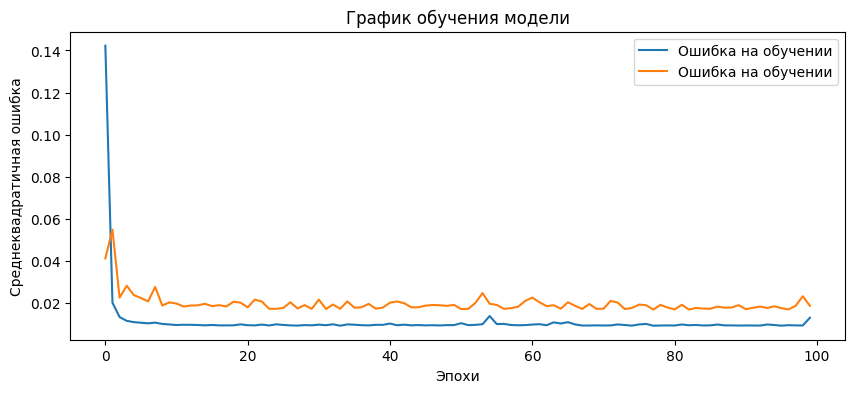

In [10]:
# Построение графика потерь во время обучения
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на обучении')
plt.title('График обучения модели')
plt.xlabel('Эпохи')
plt.ylabel('Среднеквадратичная ошибка')
plt.legend()
plt.show()

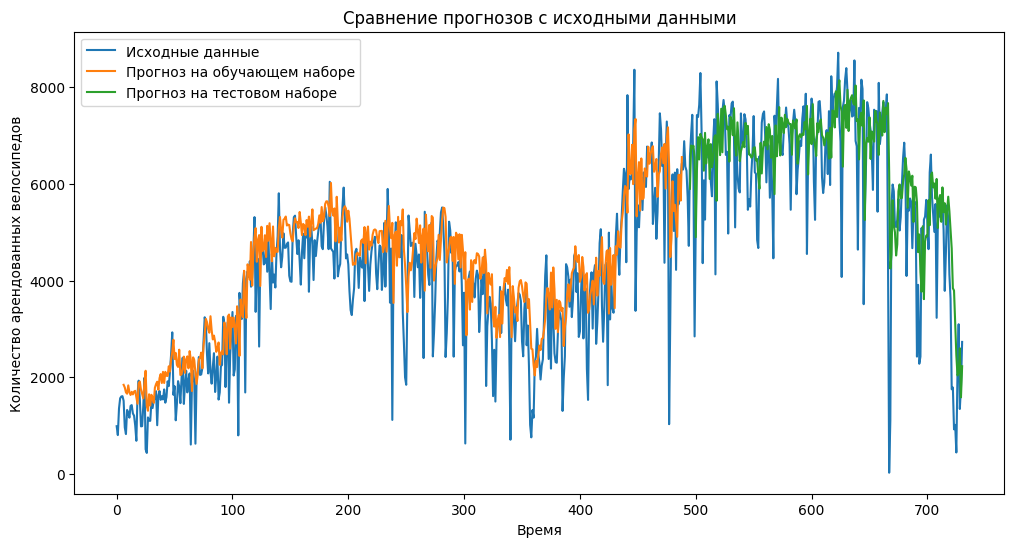

In [11]:
# Создание плейсхолдера для предсказаний, чтобы сохранить формат временного ряда
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_rnn)+look_back, :] = train_predict_rnn

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_rnn)+(look_back*2):len(dataset), :] = test_predict_rnn

jbtx = scaler.inverse_transform(dataset)
# Построение графика результатов
plt.figure(figsize=(12,6))
plt.plot(jbtx, label='Исходные данные')
plt.plot(train_predict_plot, label='Прогноз на обучающем наборе')
plt.plot(test_predict_plot, label='Прогноз на тестовом наборе')
plt.title('Сравнение прогнозов с исходными данными')
plt.xlabel('Время')
plt.ylabel('Количество арендованных велосипедов')
plt.legend()
plt.show()

# Долгая краткосрочная память (LSTM)

In [12]:
# Базовая архитектура

from tensorflow.keras.layers import LSTM

# Создание модели
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
model_lstm.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Прогнозирование
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

Epoch 1/100
483/483 - 4s - loss: 0.0150 - 4s/epoch - 7ms/step
Epoch 2/100
483/483 - 2s - loss: 0.0116 - 2s/epoch - 4ms/step
Epoch 3/100
483/483 - 2s - loss: 0.0113 - 2s/epoch - 3ms/step
Epoch 4/100
483/483 - 2s - loss: 0.0110 - 2s/epoch - 3ms/step
Epoch 5/100
483/483 - 2s - loss: 0.0102 - 2s/epoch - 5ms/step
Epoch 6/100
483/483 - 2s - loss: 0.0113 - 2s/epoch - 5ms/step
Epoch 7/100
483/483 - 2s - loss: 0.0104 - 2s/epoch - 4ms/step
Epoch 8/100
483/483 - 2s - loss: 0.0099 - 2s/epoch - 3ms/step
Epoch 9/100
483/483 - 2s - loss: 0.0104 - 2s/epoch - 3ms/step
Epoch 10/100
483/483 - 2s - loss: 0.0099 - 2s/epoch - 3ms/step
Epoch 11/100
483/483 - 2s - loss: 0.0101 - 2s/epoch - 4ms/step
Epoch 12/100
483/483 - 2s - loss: 0.0100 - 2s/epoch - 3ms/step
Epoch 13/100
483/483 - 2s - loss: 0.0097 - 2s/epoch - 5ms/step
Epoch 14/100
483/483 - 3s - loss: 0.0097 - 3s/epoch - 5ms/step
Epoch 15/100
483/483 - 2s - loss: 0.0097 - 2s/epoch - 4ms/step
Epoch 16/100
483/483 - 2s - loss: 0.0097 - 2s/epoch - 3ms/step
E

RMSE на обучающем наборе: 808.31
RMSE на тестовом наборе: 1267.75


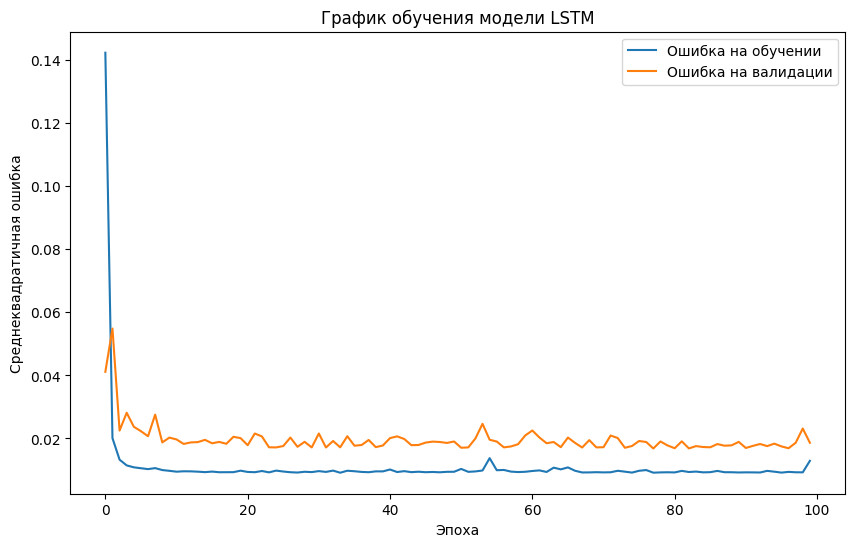

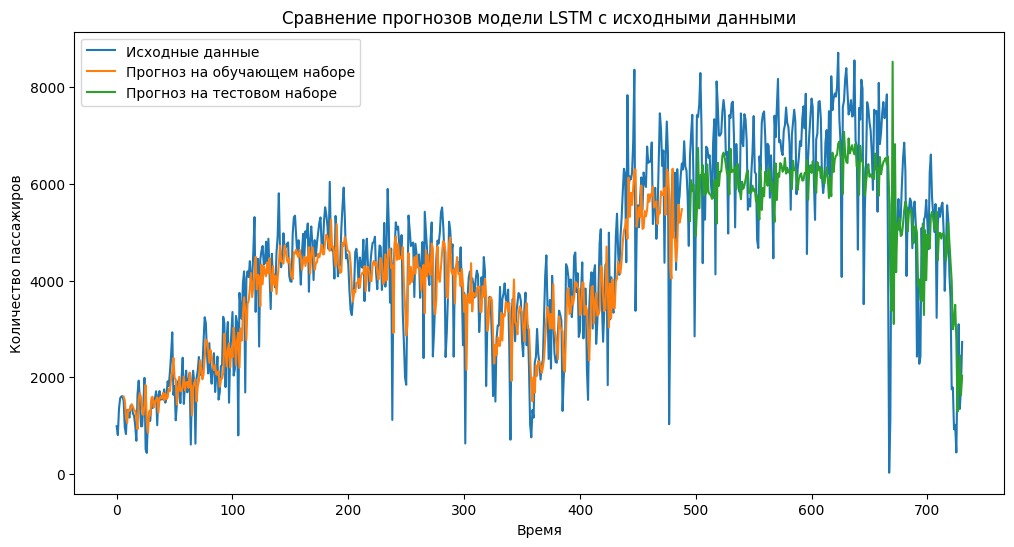

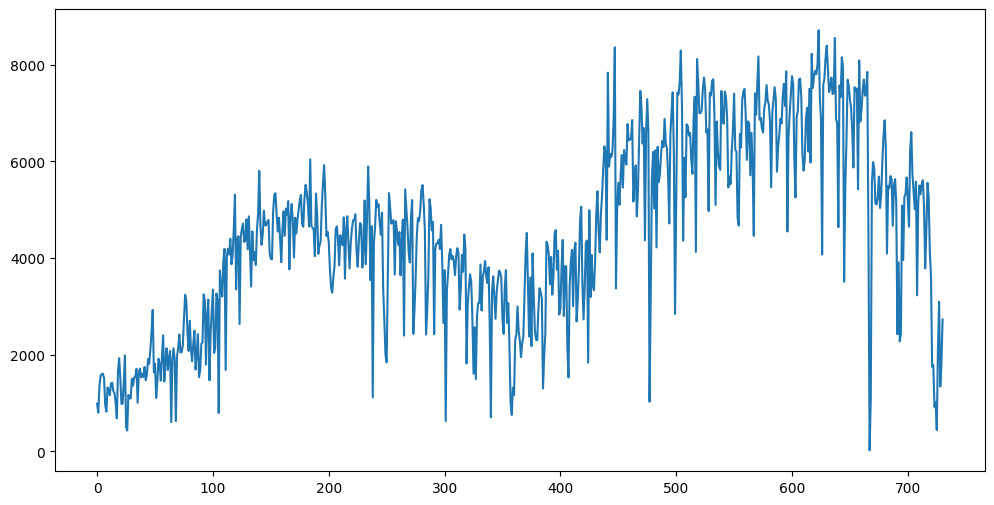

In [13]:
from sklearn.metrics import mean_squared_error

# Восстановление данных в исходный масштаб
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
Y_train_actual = scaler.inverse_transform([Y_train])
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
Y_test_actual = scaler.inverse_transform([Y_test])

# Вычисление RMSE
train_score = np.sqrt(mean_squared_error(Y_train_actual[0], train_predict_lstm[:,0]))
print(f'RMSE на обучающем наборе: {train_score:.2f}')
test_score = np.sqrt(mean_squared_error(Y_test_actual[0], test_predict_lstm[:,0]))
print(f'RMSE на тестовом наборе: {test_score:.2f}')

import matplotlib.pyplot as plt

# Построение графика ошибок во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.title('График обучения модели LSTM')
plt.ylabel('Среднеквадратичная ошибка')
plt.xlabel('Эпоха')
plt.legend()
plt.show()

# Создание плейсхолдеров для предсказаний
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_lstm)+look_back, :] = train_predict_lstm

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_lstm)+(look_back*2):len(dataset), :] = test_predict_lstm


# Построение графика исходных данных и предсказаний
plt.figure(figsize=(12, 6))
plt.plot(jbtx, label='Исходные данные')
plt.plot(train_predict_plot, label='Прогноз на обучающем наборе')
plt.plot(test_predict_plot, label='Прогноз на тестовом наборе')
plt.title('Сравнение прогнозов модели LSTM с исходными данными')
plt.xlabel('Время')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(jbtx, label='Исходные данные')
plt.show()

# Управляемые рекуррентные блоки (GRU)


In [73]:
from tensorflow.keras.layers import GRU

# Создание модели
model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(look_back, 1)))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
history = model_gru.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Прогнозирование
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

Epoch 1/200
16/16 - 3s - loss: 0.1401 - val_loss: 0.1473 - 3s/epoch - 217ms/step
Epoch 2/200
16/16 - 0s - loss: 0.0211 - val_loss: 0.0298 - 131ms/epoch - 8ms/step
Epoch 3/200
16/16 - 0s - loss: 0.0183 - val_loss: 0.0432 - 125ms/epoch - 8ms/step
Epoch 4/200
16/16 - 0s - loss: 0.0154 - val_loss: 0.0469 - 124ms/epoch - 8ms/step
Epoch 5/200
16/16 - 0s - loss: 0.0145 - val_loss: 0.0371 - 127ms/epoch - 8ms/step
Epoch 6/200
16/16 - 0s - loss: 0.0138 - val_loss: 0.0337 - 122ms/epoch - 8ms/step
Epoch 7/200
16/16 - 0s - loss: 0.0132 - val_loss: 0.0322 - 120ms/epoch - 8ms/step
Epoch 8/200
16/16 - 0s - loss: 0.0128 - val_loss: 0.0286 - 117ms/epoch - 7ms/step
Epoch 9/200
16/16 - 0s - loss: 0.0120 - val_loss: 0.0279 - 137ms/epoch - 9ms/step
Epoch 10/200
16/16 - 0s - loss: 0.0117 - val_loss: 0.0261 - 135ms/epoch - 8ms/step
Epoch 11/200
16/16 - 0s - loss: 0.0114 - val_loss: 0.0248 - 152ms/epoch - 10ms/step
Epoch 12/200
16/16 - 0s - loss: 0.0113 - val_loss: 0.0241 - 115ms/epoch - 7ms/step
Epoch 13/200


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [76]:
# Создание модели
model_gru = Sequential()
model_gru.add(GRU(100, return_sequences=True, input_shape=(look_back, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(25))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
history = model_gru.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Прогнозирование
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

Epoch 1/200
16/16 - 10s - loss: 0.0596 - val_loss: 0.0225 - 10s/epoch - 637ms/step
Epoch 2/200
16/16 - 0s - loss: 0.0184 - val_loss: 0.0445 - 236ms/epoch - 15ms/step
Epoch 3/200
16/16 - 0s - loss: 0.0146 - val_loss: 0.0351 - 243ms/epoch - 15ms/step
Epoch 4/200
16/16 - 0s - loss: 0.0138 - val_loss: 0.0253 - 298ms/epoch - 19ms/step
Epoch 5/200
16/16 - 0s - loss: 0.0127 - val_loss: 0.0236 - 232ms/epoch - 15ms/step
Epoch 6/200
16/16 - 0s - loss: 0.0125 - val_loss: 0.0274 - 244ms/epoch - 15ms/step
Epoch 7/200
16/16 - 0s - loss: 0.0122 - val_loss: 0.0262 - 248ms/epoch - 16ms/step
Epoch 8/200
16/16 - 0s - loss: 0.0120 - val_loss: 0.0283 - 274ms/epoch - 17ms/step
Epoch 9/200
16/16 - 0s - loss: 0.0127 - val_loss: 0.0260 - 280ms/epoch - 17ms/step
Epoch 10/200
16/16 - 0s - loss: 0.0125 - val_loss: 0.0247 - 283ms/epoch - 18ms/step
Epoch 11/200
16/16 - 0s - loss: 0.0123 - val_loss: 0.0233 - 250ms/epoch - 16ms/step
Epoch 12/200
16/16 - 0s - loss: 0.0116 - val_loss: 0.0233 - 299ms/epoch - 19ms/step
E

RMSE на обучающем наборе: 866.43
RMSE на тестовом наборе: 1452.18


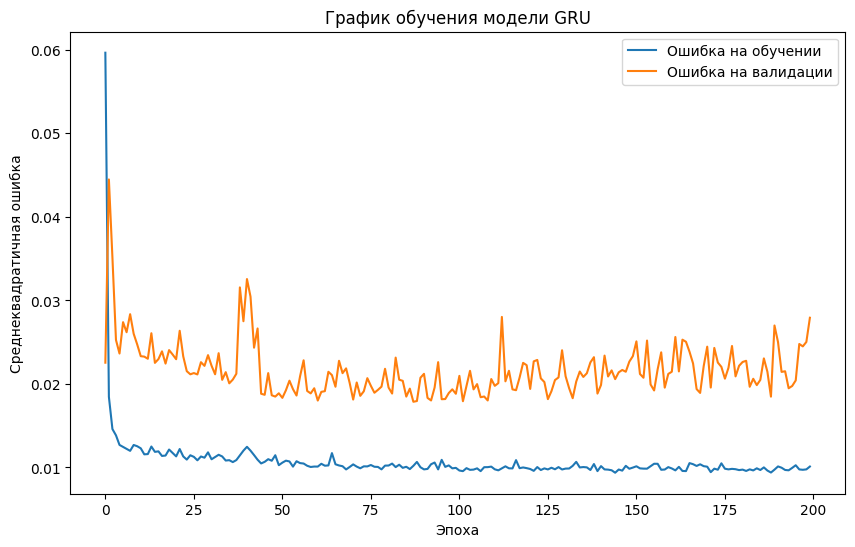

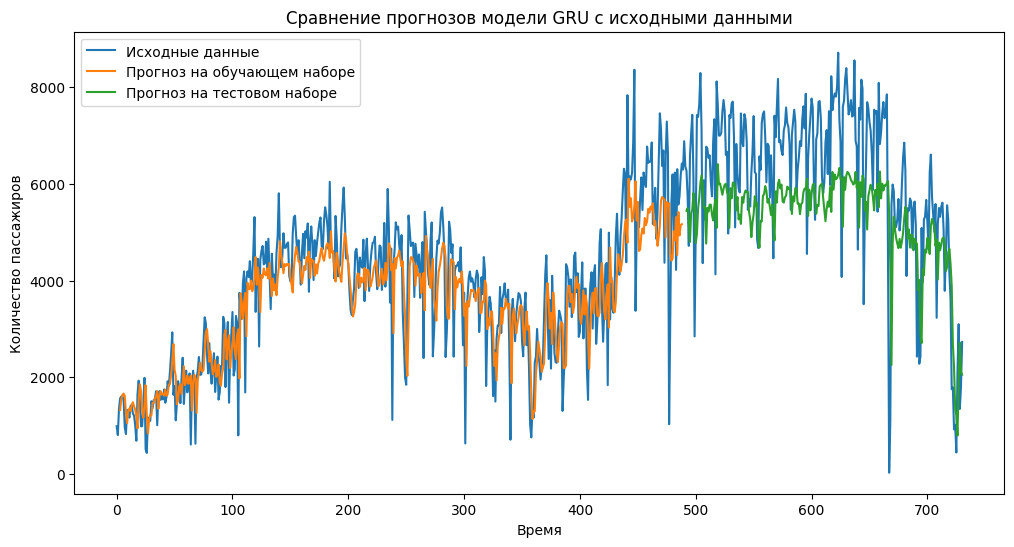

In [77]:
# Возвращение данных в исходный масштаб
train_predict_gru = scaler.inverse_transform(train_predict_gru)
Y_train_actual = scaler.inverse_transform([Y_train])
test_predict_gru = scaler.inverse_transform(test_predict_gru)
Y_test_actual = scaler.inverse_transform([Y_test])

# Вычисление RMSE
from sklearn.metrics import mean_squared_error
train_score = np.sqrt(mean_squared_error(Y_train_actual[0], train_predict_gru[:,0]))
print(f'RMSE на обучающем наборе: {train_score:.2f}')
test_score = np.sqrt(mean_squared_error(Y_test_actual[0], test_predict_gru[:,0]))
print(f'RMSE на тестовом наборе: {test_score:.2f}')

# Построение графика ошибок во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Ошибка на обучении')
plt.plot(history.history['val_loss'], label='Ошибка на валидации')
plt.title('График обучения модели GRU')
plt.ylabel('Среднеквадратичная ошибка')
plt.xlabel('Эпоха')
plt.legend()
plt.show()

# Создание плейсхолдеров для предсказаний
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_gru)+look_back, :] = train_predict_gru

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_gru)+(look_back*2):len(dataset), :] = test_predict_gru

# Построение графика исходных данных и предсказаний
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(dataset), label='Исходные данные')
plt.plot(train_predict_plot, label='Прогноз на обучающем наборе')
plt.plot(test_predict_plot, label='Прогноз на тестовом наборе')
plt.title('Сравнение прогнозов модели GRU с исходными данными')
plt.xlabel('Время')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

# Сравнительный анализ

In [80]:

# Изменение формы X для RNN [samples, time steps, features]
X_train_rnn = X_train.reshape((X_train.shape[0], look_back, 1))
X_test_rnn = X_test.reshape((X_test.shape[0], look_back, 1))

# Функция для обучения и предсказания модели
def train_and_predict_rnn(model_type, X_train, Y_train, X_test):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(64, input_shape=(look_back, 1)))
    elif model_type == 'LSTM':
        model.add(LSTM(64, input_shape=(look_back, 1)))
    elif model_type == 'GRU':
        model.add(GRU(64, input_shape=(look_back, 1)))
    model.add(Dense(forecast_horizon))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=0)
    predictions = model.predict(X_test)
    return model, predictions

# Обучение и предсказание моделей
model_rnn, Y_pred_rnn = train_and_predict_rnn('RNN', X_train_rnn, Y_train, X_test_rnn)
model_lstm, Y_pred_lstm = train_and_predict_rnn('LSTM', X_train_rnn, Y_train, X_test_rnn)
model_gru, Y_pred_gru = train_and_predict_rnn('GRU', X_train_rnn, Y_train, X_test_rnn)



8/8 [==============================] - 0s 3ms/step


In [97]:
# Функция для обратного преобразования предсказаний
def inverse_transform(predictions):
    return scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Обратное преобразование предсказаний
Y_pred_rnn_inv = inverse_transform(Y_pred_rnn)
Y_pred_lstm_inv = inverse_transform(Y_pred_lstm)
Y_pred_gru_inv = inverse_transform(Y_pred_gru)
Y_test_inv = inverse_transform(Y_test)

# Вычисление ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_errors(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true, Y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

In [100]:
 Y_pred_rnn_inv = Y_pred_rnn_inv[:239]
 Y_pred_lstm_inv = Y_pred_lstm_inv[:239]
 Y_pred_gru_inv = Y_pred_gru_inv[:239]

In [101]:
mse_rnn, mae_rnn, rmse_rnn = calculate_errors(Y_test_inv, Y_pred_rnn_inv)
mse_lstm, mae_lstm, rmse_lstm = calculate_errors(Y_test_inv, Y_pred_lstm_inv)
mse_gru, mae_gru, rmse_gru = calculate_errors(Y_test_inv, Y_pred_gru_inv)
print(f'Ошибка RNN - MSE: {mse_rnn:.4f}, MAE: {mae_rnn:.4f}, RMSE: {rmse_rnn:.4f}')
print(f'Ошибка LSTM - MSE: {mse_lstm:.4f}, MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}')
print(f'Ошибка GRU - MSE: {mse_gru:.4f}, MAE: {mae_gru:.4f}, RMSE: {rmse_gru:.4f}')


Ошибка RNN - MSE: 3012045.0000, MAE: 1330.3715, RMSE: 1735.5244
Ошибка LSTM - MSE: 3000809.0000, MAE: 1350.3529, RMSE: 1732.2843
Ошибка GRU - MSE: 3003198.7500, MAE: 1383.1791, RMSE: 1732.9740


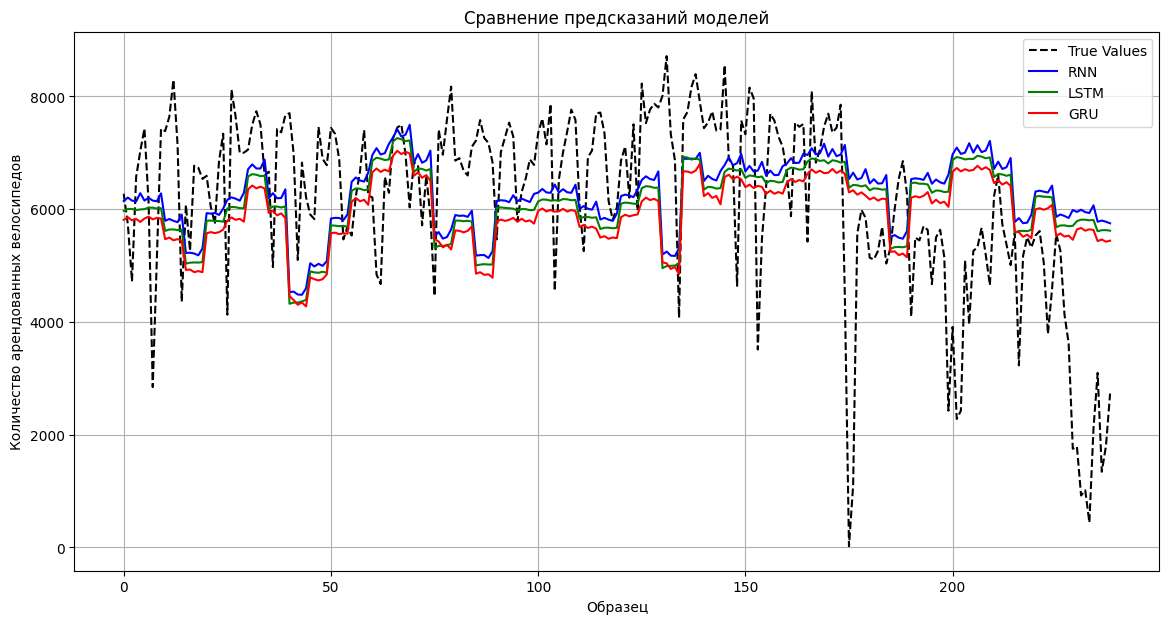

In [103]:
def plot_predictions(Y_true, Y_pred_rnn, Y_pred_lstm, Y_pred_gru, model_names):
    plt.figure(figsize=(14, 7))

    # Истинные значения
    plt.plot(Y_true, label='True Values', color='black', linestyle='--')

    # Предсказания моделей
    plt.plot(Y_pred_rnn, label=model_names[0], color='blue')
    plt.plot(Y_pred_lstm, label=model_names[1], color='green')
    plt.plot(Y_pred_gru, label=model_names[2], color='red')

    # Настройка графика
    plt.title('Сравнение предсказаний моделей')
    plt.xlabel('Образец')
    plt.ylabel('Количество арендованных велосипедов')
    plt.legend()
    plt.grid(True)
    plt.show()

# Визуализация предсказаний
plot_predictions(Y_test_inv, Y_pred_rnn_inv, Y_pred_lstm_inv, Y_pred_gru_inv, ['RNN', 'LSTM', 'GRU'])